A typical Regression Machine Learning project leverages historical data to predict insights into the future. This solution is aimed at predicting Life Expectancy rate of a country given various features.
The project tries to create a model based on data provided by the World Health Organization (WHO) to evaluate the life expectancy for different countries in years. The data offers a timeframe from 2000 to 2015. The data originates from here: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data The output algorithms have been used to test if they can maintain their accuracy in predicting the life expectancy for data they haven’t been trained

# This code analyses the life expectancy based on a different factors using DecisionTreeRegressor, Random Forest.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [41]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b9c47853ffe043638b1b7e7e6d6187bf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PGF_-KPG79WdHM8qAfljiqpODDzX-JZaHD0-PIDVP0eo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b9c47853ffe043638b1b7e7e6d6187bf.get_object(Bucket='myfirstproject-donotdelete-pr-ixs3sckbx4dbd9',Key='datasets_12603_17232_Life Expectancy Data (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [42]:
df.shape

(2938, 22)

In [43]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
cateogry_col=df.select_dtypes(include=['object']).columns.tolist()
integer_col=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_col):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


#GDP, Diptheria, Schooling, Alcohol, Percentage expenditure, Polio are factors which have high correlation with Life expectancy

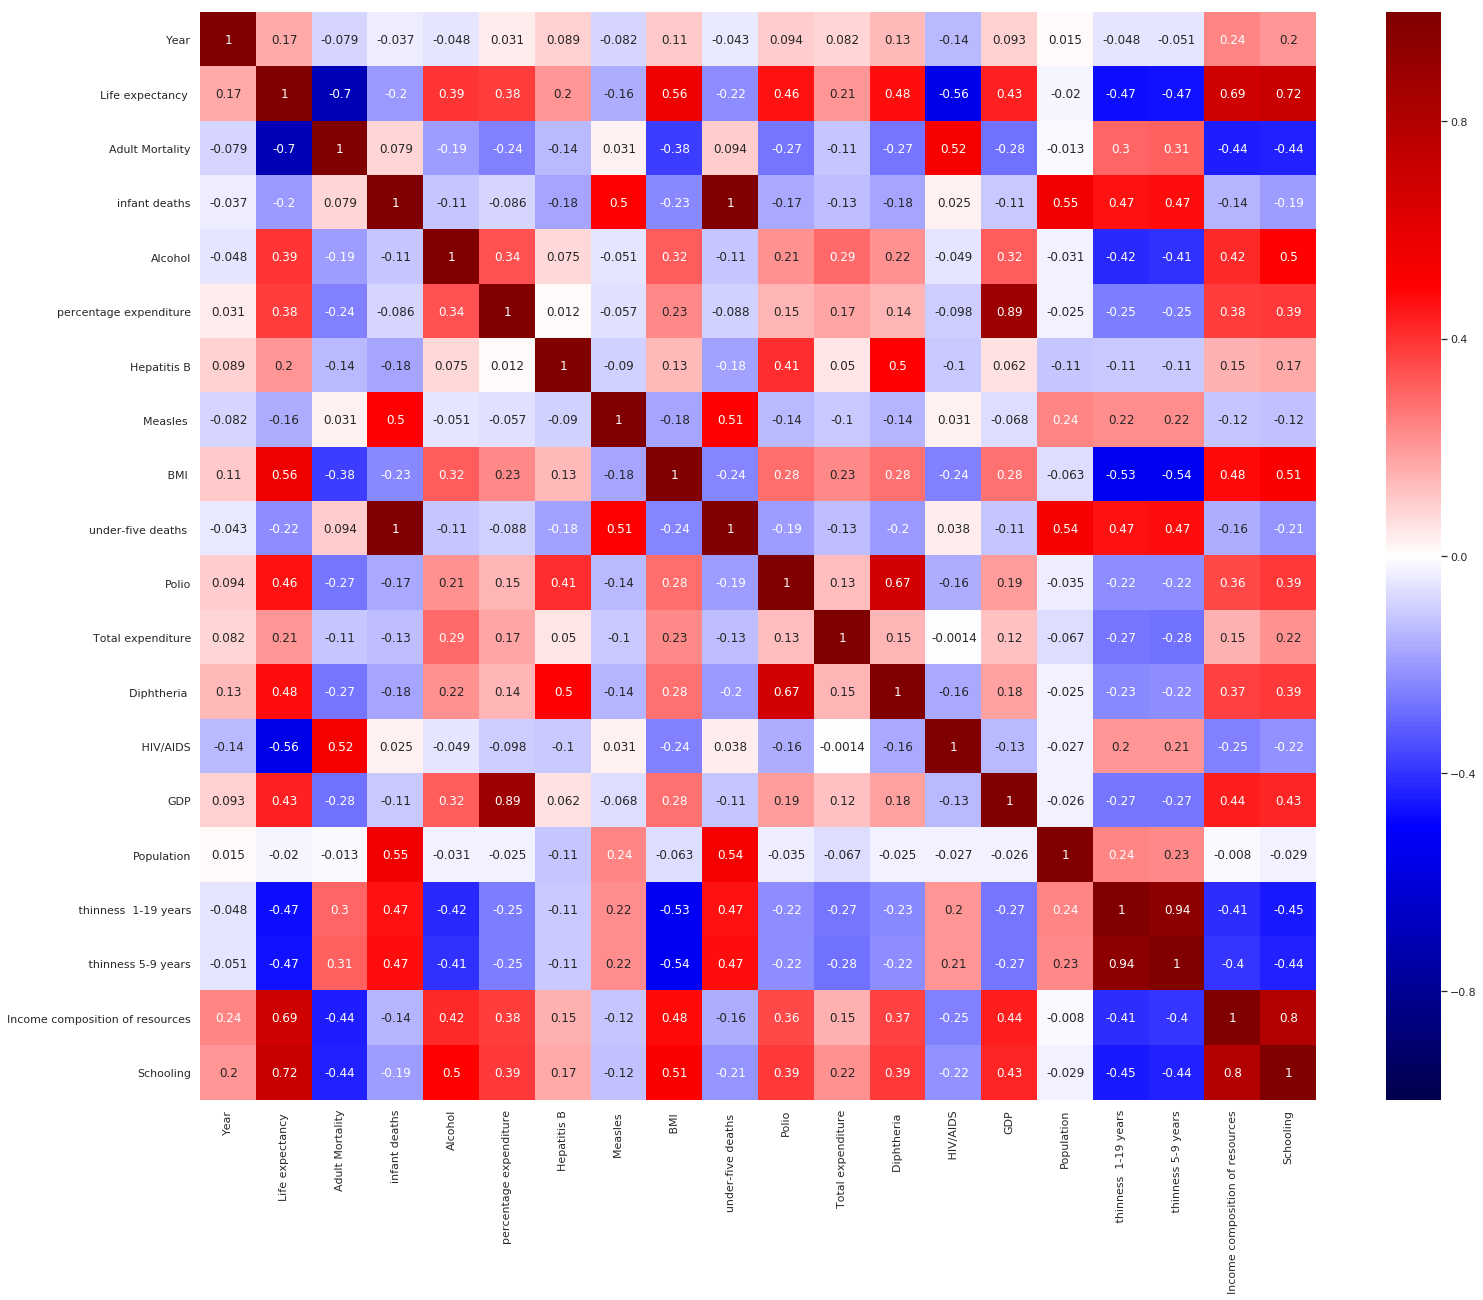

In [ ]:
sns.set(rc={'figure.figsize':(25,20)})
sns.heatmap(df.corr(),
            cmap='seismic',annot=True,vmin=-1,vmax=1)

In [ ]:
sns.pairplot(df)

In [ ]:
y = df["Life expectancy "]
x= df.drop(["Life expectancy ", "Country"], axis = 1)
x.head(5)

In above step we deleted the columns Life Expectancy and Country

In [ ]:
y.head()

# ENCODING THE CATEGORIAL VARIABLES

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
x["Status"] = labelencoder_X_1.fit_transform(x["Status"])

In [ ]:
x.head(120)

Splitting the dataset into the Training set and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Importing the accurancy score and cross val score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# DECISION TREE

A decision tree-based model builds a set of rules from the training data to be able to predict the outcome. For the sake of understanding, this algorithm is compared to trees formed through decisions. The model contains branches that represent the rules that lead to the path of the outcome, that is, the leaf. Each prediction path leads to a leaf that contains multiple values. The same principle is applied to classification-type problems as well. For regression-type problems, the final prediction is usually the average of all of the values contained in the leaf it falls under.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(x_train,y_train)
cv_score= np.sqrt(-cross_val_score(DT,x_train,y_train, cv=10, scoring='neg_mean_squared_error'))
rmse = np.mean(cv_score)
print(rmse)

After Checking using decision tree we are getting an root mean square is 3.5750783942462334.
So,Let's try for the another model

# Random Forest

Decision trees are generally considered weak models because their performance usually is not up to the expected mark when the data set is relatively large. However, when several decision trees are combined into a single model, they provide greater accuracy. Each decision tree within this random forest is built using a subset of the training data. The number of decision trees that make this random forest is an arbitrary number that can be tuned to see the changes in accuracy. When a value to be predicted is run through this resulting model, it is the average of the values acquired from each of these individual trees.s

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
cv_score= np.sqrt(-cross_val_score(rf,x_train,y_train, cv=10, scoring='neg_mean_squared_error'))
rmse = np.mean(cv_score)
print(rmse)

Since Random Forest is better we'll use RF

In [ ]:
from sklearn import metrics
prediction = rf.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, prediction))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Here Random Forest Regressor is Performing best. So,we are using this model for prediction

In [ ]:
plt.scatter(y_test,prediction)

Two models were tested : 1.Decision tree Regression 2. Random Forest Regression 

Of the two models Random Forest gave the least error and was found to be the most suitable one for giving a life expectancy prediction with an error rate as low as 1.9 %.

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials ={
  "apikey": "6EXQncDn644ci9EmQSIZI15xQntbIVSKtAuqDjq-jTzU",
  "iam_apikey_description": "Auto-generated for key 1fc30e72-c6fd-4147-a4a6-965e7c56c1c3",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/099e65c6e7b94788b005fdd913126b13::serviceid:ServiceId-bc343a58-ff11-424f-aebb-8a3e1077bd21",
  "instance_id": "45b19907-9be0-4e3b-9d2e-3588758f3b33",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [ ]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [ ]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Atharva Rakhe", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "atharvarakhe@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_Prediction"}

In [ ]:
model_artifact =client.repository.store_model(rf, meta_props=model_props)

In [ ]:
model_artifact

In [ ]:
guid = client.repository.get_model_uid(model_artifact)

In [ ]:
guid

In [ ]:
deploy = client.deployments.create(guid, name="Life_Prediction")

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [ ]:
scoring_endpoint